**README**

Gabriel Torrens\
\
Our dataset comes from: https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups.\
\
Unicorns are private companies with a valuation over $1 billion, we will analyze them. This data is sourced from CBInsights and is current as of September 1st, 2022.

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Install Kaggle, authenticate, and retrieve dataset
!pip install kaggle 
%env KAGGLE_USERNAME=xxx
%env KAGGLE_KEY=xxx
!kaggle datasets download -d ramjasmaurya/unicorn-startups --force
!unzip -o unicorn-startups.zip

# Loading dataset into a dataframe. 
df = pd.read_csv("unicorns till sep 2022.csv", header=0)

# Dataframe info:
# print(df.shape)
# print(df.columns)
# print(df.dtypes)

# Making column names lower case and removing spaces  
df.columns = [i.lower() for i in df]
df.columns = df.columns.str.replace(" ", "-")
df.rename(columns={"city\xa0":"city"}, inplace=True) #removing nonbreaking trailing space
df['valuation-($b)'] = df['valuation-($b)'].str.replace('$', '', regex=False) #remove dollar sign from valuations

# Checking dataframe:
# print(df.columns)
# print(df.head(5))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
env: KAGGLE_USERNAME=gabrieltorrens
env: KAGGLE_KEY=aeec306da3e218c51af38ce4a3d6b7dd
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 2.70MB/s]
Archive:  unicorn-startups.zip
  inflating: unicorns till sep 2022.csv  


#Our data dictionary:

| Column Name | Format | Description |
|---|---|---|
| company | Text | Company Name |
| valuation-($b) | Numeric | Valuation as of 1/1/2022 |
| country | Text | Company's home country |
| industry | Text | Company's industry |
| year | Numeric | Year the company became a unicorn |

In [ ]:
# Removing unneeded columns 
unicorns = df.drop(['investors', 'city'], axis=1).copy()

# Replacing 'date joined' with 'year' for easier analysis
unicorns['year'] = pd.to_datetime(unicorns['date-joined']).dt.year # Convert 'date-joined' to datetime and get year
unicorns = unicorns.drop(['date-joined'], axis=1)

# Convert valuation type to float
unicorns['valuation-($b)'] = unicorns['valuation-($b)'].astype(float)

# For troubleshooting:
# print(unicorns.columns)
# print(unicorns.dtypes)
# print(unicorns.head(5))


#Computing summary statistics:

In [ ]:
# Number of startups per country, largest 10 countries by value count
country_unicorns = unicorns['country'].value_counts().nlargest(10).to_string()
print(f"The top 10 countries by number of unicorns are:\n{country_unicorns}")

The top 10 countries by number of unicorns are:
United States     636
China             174
India              70
United Kingdom     46
Germany            29
France             24
Israel             22
Canada             19
Brazil             17
South Korea        17


In [ ]:
# Total valuation per country, largest 10 countries by sum of valuations
country_total_valuation = unicorns.groupby('country')['valuation-($b)'].sum().nlargest(10).sort_values(ascending=False).to_string(header=False)
print(f"The top 10 countries by total valuations (in $billions) are:\n{country_total_valuation}")

The top 10 countries by total valuations (in $billions) are:
United States     2069.89
China              678.59
United Kingdom     205.45
India              202.92
Germany             80.88
France              58.42
Australia           54.40
Canada              49.23
Israel              48.02
Brazil              40.08


In [ ]:
# Countries by mean valuation, largest 10 countries by mean valuations
country_mean_valuation = unicorns.groupby(['country'])['valuation-($b)'].mean().round(2).nlargest(10).sort_values(ascending=False).to_string(header=False)
print(f"The top 10 countries by mean valuation (in $billions) are:\n{country_mean_valuation}")

The top 10 countries by mean valuation (in $billions) are:
Bahamas           32.00
Seychelles        10.00
Australia          6.80
Turkey             5.26
Estonia            4.95
United Kingdom     4.47
Indonesia          4.16
China              3.90
Austria            3.80
Denmark            3.35


In [ ]:
# Number of unicorns per industry, largest 10 industries by value count
industry_count = unicorns['industry'].value_counts().nlargest(10).to_string()
print(f"The top 10 industries by number of unicorns are:\n{industry_count}\n")

The top 10 industries by number of unicorns are:
Fintech                                239
Internet software & services           224
E-commerce & direct-to-consumer        103
Health                                  94
Artificial intelligence                 74
Supply chain, logistics, & delivery     65
Other                                   65
Cybersecurity                           58
Data management & analytics             45
Auto & transportation                   40



#Decacorns are firms with over a $10 billion valuation. We will explore decacorn data by plotting.


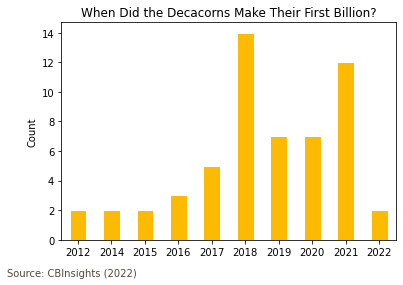

In [ ]:
# Find our decacorns
decacorns = unicorns.loc[(unicorns['valuation-($b)']>=10)].copy()

# Creating a chart to see when decacorns first made the CBInsights list

# Adding a source below the graph
fig = plt.figure()
fig.text(x=0, y=0, s='Source: CBInsights (2022)', horizontalalignment='left',color='#524939')

# Plotting the series of count per year
decacorns["year"].value_counts(sort=False).sort_index().plot(kind="bar", title="When Did the Decacorns Make Their First Billion?", color="#fcba03", edgecolor="white", rot=0);
plt.ylabel("Count")
plt.show()

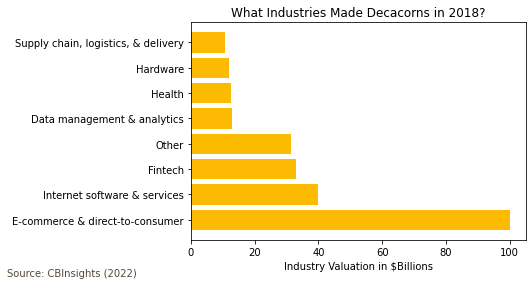

In [ ]:
# How much did each industry raise in 2018?

# Find our 2018 decacorns
decacorns2018 = decacorns.loc[decacorns['year']==2018].reset_index(drop=True).copy()

# Adding a source below the graph
fig = plt.figure()
fig.text(x=-0.3, y=0, s='Source: CBInsights (2022)', horizontalalignment='left',color='#524939')

# Set up Axes
ax = fig.add_subplot(111)
ax.set_title('What Industries Made Decacorns in 2018?')
ax.set_xlabel('Industry Valuation in $Billions')

# Plot the data
ax.barh(decacorns2018["industry"], decacorns2018["valuation-($b)"], color = '#fcba03')

# Show the plot
plt.show()

In [ ]:
# BONUS: Who are the 2018 decacorns?
print(decacorns2018)

                   company  valuation-($b)         country  \
0                    SHEIN           100.0           China   
1                    Canva            40.0       Australia   
2                  Revolut            33.0  United Kingdom   
3               Epic Games            31.5   United States   
4                  Discord            15.0   United States   
5                    Plaid            13.5   United States   
6                  Celonis            13.0         Germany   
7           Devoted Health            12.6   United States   
8                     Brex            12.3   United States   
9     Bitmain Technologies            12.0           China   
10  Biosplice Therapeutics            12.0   United States   
11                Airtable            11.7   United States   
12                  Swiggy            10.7           India   
13                Talkdesk            10.0   United States   

                               industry  year  
0       E-commerce & 